In [54]:
#default style guide
from matplotlib import style
style.use('fivethirtyeight')

In [56]:
# Import the dependencies
import pandas as pd
import numpy as np
import datetime

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, text, func

# Reflect Tables into SQLAlchemy ORM

In [59]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [61]:
# Open the Threads
session = Session(engine) # ORM
conn = engine.connect() # Raw SQL/Pandas

In [63]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names within the 'dow' table and its types
for table in tables:
    print(table)
    print("--------")
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

measurement
--------
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

station
--------
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT



In [65]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(engine)
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [67]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [69]:
query = text("SELECT * FROM measurement")
df = pd.read_sql(query, con = conn)
df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [71]:
query = text("SELECT * FROM station")
df = pd.read_sql(query, con = conn)
df.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


# Exploratory Precipitation Analysis

In [74]:
# Find the most recent date in the data set.(using raw sql)
most_recent_date = text("""SELECT 
                                max(date)
                            FROM 
                                measurement
                        """)
conn.execute(most_recent_date).fetchall()

[('2017-08-23',)]

In [76]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
last_12_months_prcp_data = text("""SELECT 
                                        date, prcp 
                                    FROM 
                                        measurement
                                    WHERE
                                        date >='2016-08-23' AND date <='2017-08-23';
                                """)
# Save the query results as a Pandas DataFrame. Explicitly set the column names
result = conn.execute(last_12_months_prcp_data).fetchall()
precipitation_df = pd.DataFrame(result, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
precipitation_df= precipitation_df.sort_values(by='Date')
precipitation_df

,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


<Figure size 1800x600 with 0 Axes>

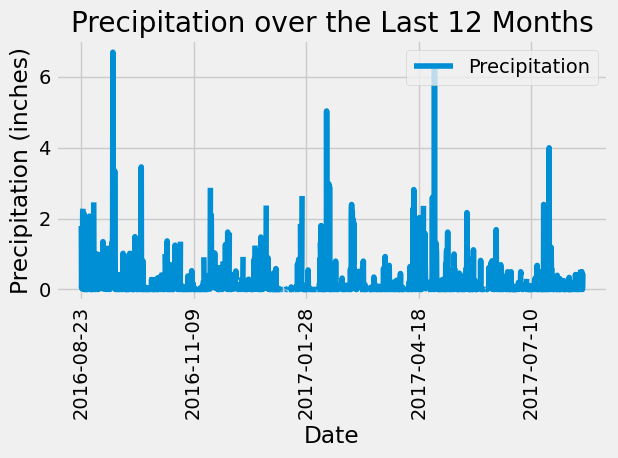

In [78]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(18,6))  # Set the figure size
precipitation_df.plot(x='Date', y='Precipitation')
plt.legend(loc='upper right')

# Set the plot title and labels
plt.title('Precipitation over the Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Tight layout to ensure everything fits nicely
plt.tight_layout()

# Save the graph
plt.savefig("Precipitation_plot.png")

# Show the plot
plt.show()

In [80]:
# Find the most recent date in the data set. (using ORM)
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
most_recent_date


'2017-08-23'

In [82]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
last_12_months_prcp_data= session.query(Measurement.date, Measurement.prcp)\
                                        .filter(Measurement.date >= '2016-08-23')\
                                        .filter(Measurement.date <= '2017-08-23')\
                                        .order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(last_12_months_prcp_data, columns=['Date','Precipitation'])

# Sort the dataframe by date
precipitation_df= precipitation_df.sort_values(by='Date')
precipitation_df

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2228,2017-08-23,0.08
2226,2017-08-23,0.00
2227,2017-08-23,0.00


<Figure size 1800x600 with 0 Axes>

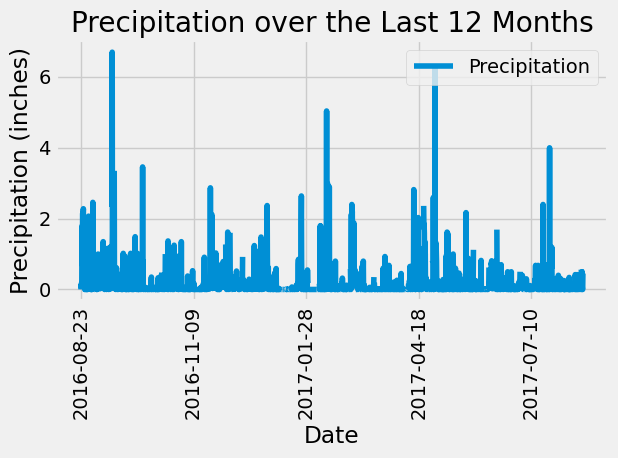

In [84]:
# Use Pandas Plotting with Matplotlib to plot the data

plt.figure(figsize=(18,6))  # Set the figure size
precipitation_df.plot(x='Date', y='Precipitation')
plt.legend(loc='upper right')

# Set the plot title and labels
plt.title('Precipitation over the Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Tight layout to ensure everything fits nicely
plt.tight_layout()

# Save the graph
plt.savefig("Precipitation_plot.png")
# Show the plot
plt.show()


In [86]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [89]:
# Design a query to calculate the total number of stations in the dataset(using RAW SQL)
total_stations = text("""SELECT 
                    count(distinct(station))
                FROM 
                    measurement
            """)
conn.execute(total_stations).fetchall()

[(9,)]

In [91]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
result = text("""SELECT 
                    station, count(station) as "station_count" 
                FROM 
                    measurement
                GROUP BY 
                    station
                ORDER BY
                    station_count desc;
                """)
conn.execute(result).fetchall()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [93]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_stats = text("""SELECT 
                    min(Measurement.tobs), max(Measurement.tobs), avg(Measurement.tobs)
                FROM 
                    measurement
                WHERE 
                    station = 'USC00519281';
                """)
conn.execute(temp_stats).fetchall()

[(54.0, 85.0, 71.66378066378067)]

In [95]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_months_temp_data = text("""SELECT 
                                        tobs
                                    FROM 
                                        measurement
                                    WHERE station = 'USC00519281'
                                        AND 
                                        date >='2016-08-23' AND date <='2017-08-23';
                                """)
# Save the query results as a Pandas DataFrame. Explicitly set the column names
result = conn.execute(last_12_months_temp_data).fetchall()
station_temp_df = pd.DataFrame(result, columns=['Temperature'])

# Sort the dataframe by date
station_temp_df= station_temp_df.sort_values(by='Temperature')
station_temp_df.head()

,Temperature
163,59.0
169,59.0
170,59.0
250,60.0
164,60.0


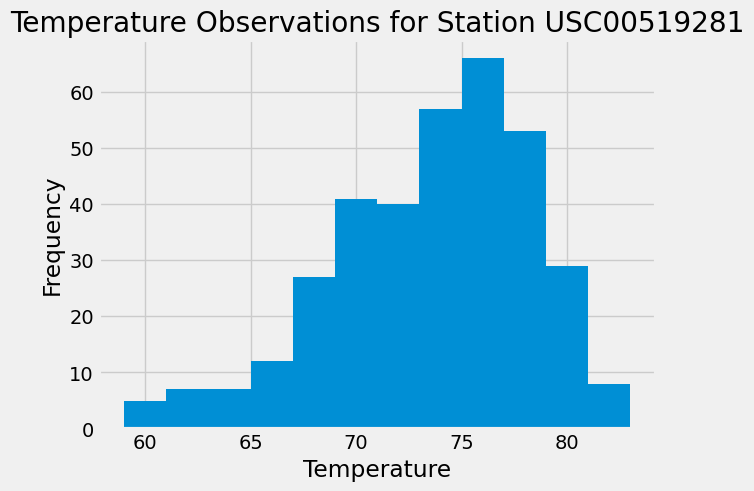

In [99]:
# plot a histogram of the results
station_temp_df["Temperature"].hist(bins=12)

# Set the plot title and labels
plt.title("Temperature Observations for Station USC00519281")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Save the graph
plt.savefig("Temperature_histogram.png")

# Show the plot
plt.show()

In [101]:
# Design a query to calculate the total number of stations in the dataset (Using ORM)
total_stations = session.query(Station.station).count()
total_stations

9

In [103]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
result = session.query(
    Measurement.station, 
    func.count(Measurement.id)
).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
result

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [105]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_stats = session.query(func.min(Measurement.tobs).label('min_temp'),
                           func.max(Measurement.tobs).label('max_temp'),
                           func.avg(Measurement.tobs).label('avg_temp')).filter(Measurement.station=='USC00519281').all()
temp_stats

[(54.0, 85.0, 71.66378066378067)]

In [107]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_months_temp_data = session.query(Measurement.tobs)\
                            .filter(Measurement.date >= '2016-08-23')\
                            .filter(Measurement.date <= '2017-08-23')\
                            .filter(Measurement.station == "USC00519281").all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
station_temp_df = pd.DataFrame(last_12_months_temp_data, columns=["Temperature"])

# Sort the dataframe by date
station_temp_df= station_temp_df.sort_values(by='Temperature')
station_temp_df.head()


,Temperature
163,59.0
169,59.0
170,59.0
250,60.0
164,60.0


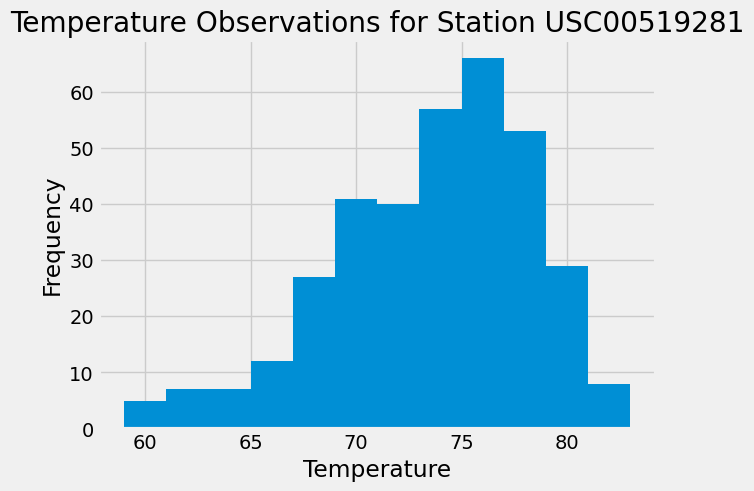

In [109]:
# Plot a histogram of the temperatures
# plot a histogram of the results
station_temp_df["Temperature"].hist(bins=12)

# Set the plot title and labels
plt.title("Temperature Observations for Station USC00519281")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Save the graph
plt.savefig("Temperature_histogram.png")

# Show the plot
plt.show()

# Close Session

In [112]:
# Close Session
session.close()
engine.dispose()